In this assignement, we are going to complete the rest of preprocessing tasks in the `data_preprocessing` tutorial. 

Please complete **Exercise 1-4** in this tutorial.

We will use the [Student Alcohol Consumption data set](https://www.kaggle.com/uciml/student-alcohol-consumption) available in Kaggle. 

*"The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.*

The dataset can be used to predict student performance.

## Download Dataset
1. Download the dataset from https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
2. Put the csv file in the `data` folder

## Pandas
*"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool"*

"10 minutes to pandas", https://pandas.pydata.org/docs/user_guide/10min.html

In [2]:
import pandas as pd

# some CSV files are not separated with comma, but weirdly with some other symbols, such as semicolon ',' in this case...
df = pd.read_csv('data/student-mat.csv', sep=',')

# # In case you have too many columns, pandas automatically skips to display some of the columns in the middle.
# # We will disable this option for this exercise.
#pd.set_option('display.max_columns', None) 

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 1. Sampling

When you have a data set with millions of entries, the shear volume of data can be overwhelming and you might be hindered to see inside of the data set and develop some insights. To this end, it is always a good practice to sample the data set and create a smaller data set with handful amount of subsamples.

In Pandas, subsampling a data set can be as simple as `df.sample()` as shown below. The function draws random subsamples from the DataFrame.

In [42]:
sampled = df.sample(n=10)
sampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
337,GP,F,17,U,GT3,T,3,2,other,other,...,4,3,2,2,3,2,0,7,8,0
31,GP,M,15,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0,17,16,17
313,GP,F,19,U,LE3,T,3,2,services,other,...,4,2,2,1,2,1,22,13,10,11
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,3,4,3,5,3,8,9,9,10
83,GP,M,15,U,LE3,T,2,2,services,services,...,5,3,3,1,3,4,4,15,15,15
252,GP,M,18,U,GT3,T,2,1,services,services,...,3,2,5,2,5,5,4,6,9,8
191,GP,F,17,U,GT3,T,1,1,at_home,services,...,5,3,3,1,1,3,0,8,8,9
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,3,3,2,2,2,5,0,7,6,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,4,3,3,2,2,5,2,15,15,14


Or, alternatively, you can use the argument `frac` to define the fraction (percentage) of the original data you would like to sample. For example, to sample 2% of the original data points, you can call something like this:

In [43]:
sampled2 = df.sample(frac=0.2)
sampled2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
53,GP,F,15,U,GT3,T,4,4,services,services,...,3,3,4,2,3,5,0,8,10,11
330,GP,M,18,U,LE3,T,2,2,other,other,...,4,5,5,2,4,5,2,9,8,8
241,GP,M,17,R,LE3,A,4,4,teacher,other,...,3,3,3,2,3,4,2,10,11,12
119,GP,M,15,U,GT3,T,3,4,other,other,...,3,4,3,1,2,4,6,14,13,13
212,GP,F,16,U,GT3,A,2,2,other,other,...,3,3,4,1,1,4,0,12,13,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,GP,M,16,U,GT3,T,3,3,other,services,...,4,5,5,4,4,5,4,10,12,12
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,5,3,2,1,1,5,0,13,13,14
340,GP,F,19,U,GT3,T,2,1,services,services,...,4,3,4,1,3,3,4,11,12,11
350,MS,M,19,R,GT3,T,1,1,other,services,...,5,4,4,3,3,2,8,8,7,8


Note that the options `n` and `frac` CANNOT be used together.

We use all the data in this tutorial (no sampling).

## 2. Transformation

One thing you perhaps might have noticed is that some of the columns are in non-numeric format. For exampe, `sex` is in either `F` or `M`, `famsize` (family size) is either `GT3` or `LE3`, `guardian` is either `mother`, `father`, or `other`, so on and so forth.

In [44]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


This can actually be problematic later, because, eventually your machine learning model (which is basically some "kinda sorta" math formula) would expect to see numeric values, not strings or texts. Thus, what we want to do over here is to convert them into numeric values. For example, we could use a binary variable to indicate if the student is female (1) or not (0). We could use the same strategy for the family size by denoting `1` for a large family (`GT3`) and `0` for a small family (`LE3`).

In [45]:
df = df.replace({                     # Don't run this line twice
    'sex': {'F': 1, 'M': 0},          #
    'famsize': {'GT3': 1, 'LE3': 0}   #
                })                    #
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,0,16,U,0,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,0,16,U,0,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,1,17,U,1,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,0,15,U,0,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,0,15,U,1,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In the above, notice the use and the structuring of the curly braces. That is, `DataFrame.replace()` function expects the "mapping rules" to be defined as dictionaries. The outer curly braces simply list the columns that are being mapped, while the inner curly braces specifies the conversion rule. Please pause and ponder to make sure the syntax makes sense to you.

Here, you might wonder, however, how to numerize the `guardian` column. For `sex` and `famsize` there was a quite intuitive and trivial way of assigning binary digits. However, for the `guardian` column, there are now three different types of vaues in concern, namely `mother`, `father`, and `other`, which is not binary anymore.

One may argue that we can still solve this issue by assigning some integer numbers. For instanace, `mother = 1`, `father = 2`, and `other = 3`, or some similar sort. However, you have to be very careful when you assign those numbers as the numbers have "magnitude" and the magnitude actually means a lot in most of the machine learning models. For example, with the above example, your machine learning model would perceive having other guardian than mother or father is more "significant", which might bias your model. Furthermore, quantitativey, the "significance" of having other guardian is 3x times larger than having mother as guardian and 1.5x higher than having father as guardian, which doesn't even make sense at all. Situations like this is called *nominal (categorical) variables*, where ordering between categories doesn't really make any sense.

For nominal variables, we convert them into something called *dummy variables*, *indicator variables*, or *one-hot-encoding*. Construction of dummy variables is actually quite simple. First, count how many total categories your variable can have. In our case, `guardian` can have total three different categories. Second, construct a "zero-vector" of the dimension equal to the total number of categories. Again, `guardian` variable should have `[0, 0, 0]`. Lastly, flag an element with `1` depending on the category. For example, if a student has `mother` as `guardian`, the vector value should now turn into `[1, 0, 0]`, for `father`, `[0, 1, 0]`, and for `other`, `[0, 0, 1]`. In this way, you can effectively convert categorical variables into numeric values without posing any bias.

(*Sometimes, people use one less elements in the dummy variable than the total number of categories, to remove the redundancy. In this case, the cateogry that is not explicitly encoded is called the "reference". For example, we can use `mother` as reference and set `[1, 0]` for `father` and `[0, 1]` for `other`.)

In pandas, converting to dummy variables is as simple as `DataFrame.get_dummies`.

In [46]:
df = pd.get_dummies(df, columns=["guardian"]) # can actually list multiple columns if necessary
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,1,0
1,GP,1,17,U,1,T,1,1,at_home,other,...,1,1,3,4,5,5,6,1,0,0
2,GP,1,15,U,0,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0,1,0
3,GP,1,15,U,1,T,4,2,health,services,...,1,1,5,2,15,14,15,0,1,0
4,GP,1,16,U,1,T,3,3,other,other,...,1,2,5,4,6,10,10,1,0,0


### Exercise 1:
- List all the other columns that need to be converted to numeric values. (5 pts)
- For each of the values you listed above, what are the binary variables and what are the nominal variables and ordinal variables? (5 pts)
- Write a code to transform the given data set to a numeric table. (30 pts)

In [47]:
# listed all the columns along with the hidden middle columns
my_list = df.columns.values.tolist()
my_list

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'guardian_father',
 'guardian_mother',
 'guardian_other']

In [48]:
# printed unique values from each column to figure out the data type and values the feature hold
# here, have kept only the features that needs to be converted 

print(df.school.unique())
print(df.address.unique())
print(df.Pstatus.unique())
print(df.Mjob.unique())
print(df.Fjob.unique())
print(df.reason.unique())
print(df.schoolsup.unique())
print(df.famsup.unique())
print(df.paid.unique())
print(df.activities.unique())
print(df.nursery.unique())
print(df.higher.unique())
print(df.internet.unique())
print(df.romantic.unique())


['GP' 'MS']
['U' 'R']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']


1. Here is the list of all columns that need to be converted to numeric values:
* school
* address
* Pstatus
* Mjob
* Fjob
* reason
* schoolsup
* famsup
* paid
* activities
* nursery
* higher
* internet
* romantic

2. Here is the column name and its type (with unique values listed in brackets for each column):
* school - Binary  (['GP' 'MS'])
* address - Binary (['U' 'R'])
* Pstatus - Binary (['A' 'T'])
* Mjob - Nominal (['at_home' 'health' 'other' 'services' 'teacher'])
* Fjob - Nominal (['at_home' 'health' 'other' 'services' 'teacher'])
* reason - Nominal (['course' 'other' 'home' 'reputation'])
* schoolsup - Binary (['yes' 'no'])
* famsup - Binary (['yes' 'no'])
* paid - Binary (['no' 'yes'])
* activities - Binary(['no' 'yes'])
* nursery - Binary(['no' 'yes'])
* higher - Binary(['yes' 'no'])
* internet - Binary(['no' 'yes'])
* romantic - Binary(['no' 'yes'])







 

In [3]:
# 3. Here is the coversion of features code
# Converting all the columns listed above to numeric value

# conversion of binary features
df = df.replace({                     
    'school': {'GP': 1, 'MS': 0},          
    'address': {'U': 1, 'R': 0} ,
    'Pstatus': {'A': 1, 'T': 0} ,
    'schoolsup': {'yes': 1, 'no': 0} ,
    'famsup': {'yes': 1, 'no': 0} ,
    'paid': {'yes': 1, 'no': 0} ,
    'activities': {'yes': 1, 'no': 0} ,
    'nursery': {'yes': 1, 'no': 0} ,
    'higher': {'yes': 1, 'no': 0} ,
    'internet': {'yes': 1, 'no': 0} ,
    'romantic': {'yes': 1, 'no': 0} ,
                })                    
# conversion of nominal features
df = pd.get_dummies(df, columns=["Mjob"]) 
df = pd.get_dummies(df, columns=["Fjob"]) 
df = pd.get_dummies(df, columns=["reason"]) 

df.head(10)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,F,18,1,GT3,1,4,4,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,F,17,1,GT3,0,1,1,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,F,15,1,LE3,0,1,1,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,F,15,1,GT3,0,4,2,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,1,F,16,1,GT3,0,3,3,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,1,M,16,1,LE3,0,4,3,mother,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,1,M,16,1,LE3,0,2,2,mother,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,1,F,17,1,GT3,1,4,4,mother,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8,1,M,15,1,LE3,1,3,2,mother,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19,0,0,0,1,0,0,0,1,0,0,0,1,0,0
9,1,M,15,1,GT3,0,3,4,mother,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15,0,0,1,0,0,0,0,1,0,0,0,1,0,0


## 3. Discretization
Sometimes, your data is too granular that you might be hindered from seeing the big trend. Also, when the data is noisy, high-resolution measurement of a quantity is not always a desirable thing. No matter what the reason is, one useful trick to analyze a large data is to discretize (quantize) the values. For example, let us take a look at the absences data.

<AxesSubplot:ylabel='Frequency'>

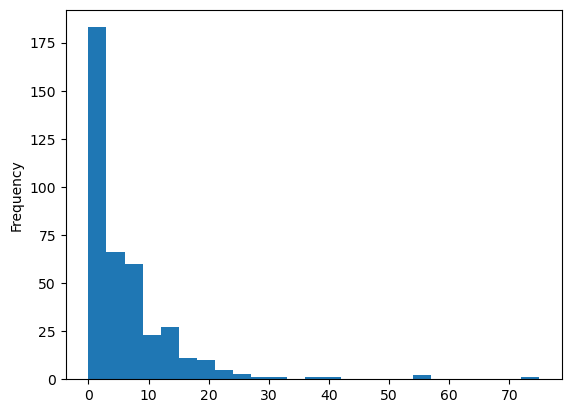

In [50]:
df.absences.plot(kind='hist', bins=25)

In [51]:
df.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

First, we can notice that many of the students have zero absences. Then, another big majority of students have absence values less than or equal to 5. Some students are between 5 and 15, and there are also some extreme cases where the total number absences is way beyond 15. From this observation, one potential discretization of data is as follows:

In [52]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Note that `pd.cut` accepts a Pandas `Series` object and outputs a discretized `Series` object. The second argument (input) to `pd.cut` is the list of intervals or the bins. In our case, we would like to have [0, 1), [1, 5), [5, 15), and [15, inf) as our bins, representing 'no absence at all', 'only a few absences', 'some absences', and 'many absences', respectively, so the bins become `[0, 1, 5, 15, float("inf")]`. Notice the weird way of denoting the infinity in Python. Also, `right=False` at the end of the `pd.cut` arguments indicates that the intervals (bins) will not include the right limits. If it is turned `True`, which is the default setting, the intervals will become (0, 1], (1, 5], (5, 15], and (15, inf], instead (notice the parentheses and square brackets).

Meanwhile, in `pd.cut`, we can specify the label for each bin. In this example, we use `0, 1, 2, 3` as labels for those bins, respectively, the numbers indicating the "severity of absences". Technically, the bins are considered as categorical variables. However, in our case, the "categories" actually have some ordering (i.e. there exists the notion of magnitude), as opposed to the examples above. In this case, the variables are called *ordinal variables*.

Given this, we replace the `absences` column with the new discretized column:

In [53]:
df['absences_discretized'] = absences_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized
0,1,1,18,1,1,1,4,4,2,2,...,0,0,0,0,1,1,0,0,0,2
1,1,1,17,1,1,0,1,1,1,2,...,0,0,1,0,0,1,0,0,0,1
2,1,1,15,1,0,0,1,1,1,2,...,0,0,1,0,0,0,0,1,0,2
3,1,1,15,1,1,0,4,2,1,3,...,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,0,3,3,1,2,...,0,0,1,0,0,0,1,0,0,1


### Exercise 2:
- Other than absences, what else can be discretized? (5 pts)
- Please discretize these columns. (10 pts)

Here is the list of features apart from absences that can be discretized:
* age
* G1
* G2
* G3

In [4]:
# below is the code for discretizing the features listed above, 
# also the drop code line is commented, as the orignal features are used further in this notebook

age_discretized = pd.cut(df.age, [15, 17, 19, 21, float("inf")], labels=[0, 1, 2, 3], right=False)
print(age_discretized)
df['age_discretized'] = age_discretized.astype('int')   
#df = df.drop(columns='age')

G1_discretized = pd.cut(df.G1, [0, 6, 11, 16, float("inf")], labels=[0, 1, 2, 3], right=False)
print(G1_discretized)
df['G1_discretized'] = G1_discretized.astype('int')  
#df = df.drop(columns='G1')

G2_discretized = pd.cut(df.G2, [0, 6, 11, 16, float("inf")], labels=[0, 1, 2, 3], right=False)
print(G2_discretized)
df['G2_discretized'] = G2_discretized.astype('int')  
#df = df.drop(columns='G2')

G3_discretized = pd.cut(df.G3, [0, 6, 11, 16, float("inf")], labels=[0, 1, 2, 3], right=False)
print(G3_discretized)
df['G3_discretized'] = G3_discretized.astype('int')  
#df = df.drop(columns='G3')


df.head(10)

0      1
1      1
2      0
3      0
4      0
      ..
390    2
391    1
392    3
393    1
394    2
Name: age, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]
0      0
1      0
2      1
3      2
4      1
      ..
390    1
391    2
392    1
393    2
394    1
Name: G1, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]
0      1
1      0
2      1
3      2
4      1
      ..
390    1
391    3
392    1
393    2
394    1
Name: G2, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]
0      1
1      1
2      1
3      2
4      1
      ..
390    1
391    3
392    1
393    1
394    1
Name: G3, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,age_discretized,G1_discretized,G2_discretized,G3_discretized
0,1,F,18,1,GT3,1,4,4,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1
1,1,F,17,1,GT3,0,1,1,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,1,F,15,1,LE3,0,1,1,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1
3,1,F,15,1,GT3,0,4,2,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,2
4,1,F,16,1,GT3,0,3,3,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1
5,1,M,16,1,LE3,0,4,3,mother,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,2,2
6,1,M,16,1,LE3,0,2,2,mother,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2,2,2
7,1,F,17,1,GT3,1,4,4,mother,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1
8,1,M,15,1,LE3,1,3,2,mother,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3,3,3
9,1,M,15,1,GT3,0,3,4,mother,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2,2,2


## 4. Aggregation

One of the important outcome metrics in the table are the grades (`G1`, `G2`, and `G3`). In the data set, the student performance was tracked over a period of time, such that `G1`, `G2`, and `G3` capture the change of student performance over time. However, in some cases, this might just create a confusion and you may just want to merge them into a single value for some reason. In such cases, we can *aggregate* the columns by averaging them.

Note the term *data aggregation* is often used for a lot more chaotic size of the values than just three in our case. But this example is intended to get you a feel for how data aggregation is done in Pandas. Hence, we won't bother to make the example more realistic. This being said, let us simply try to aggregate the three columns by taking the average of them.

In [6]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [7]:
df['G_agg'] = G_agg
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,age_discretized,G1_discretized,G2_discretized,G3_discretized,G_agg
0,1,F,18,1,GT3,1,4,4,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,5.666667
1,1,F,17,1,GT3,0,1,1,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,5.333333
2,1,F,15,1,LE3,0,1,1,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,8.333333
3,1,F,15,1,GT3,0,4,2,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,2,14.666667
4,1,F,16,1,GT3,0,3,3,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,8.666667


You can also think of a slightly different scenario for aggregation, where instead of aggregating the columns, you would like to aggregate the rows by grouping them according to some criteria. For example, let's take a look at the weekend alcohol consumption column (`Walc`). We can aggregate the rows based on the weekend alcohol consumption by calling:

In [8]:
df.groupby('Walc').mean()

,school,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,age_discretized,G1_discretized,G2_discretized,G3_discretized,G_agg
Walc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.933775,16.450331,0.834437,0.132450,2.821192,2.536424,1.377483,2.284768,0.251656,0.192053,0.655629,0.390728,0.569536,0.834437,0.953642,0.814570,0.337748,4.059603,3.158940,2.735099,1.006623,3.443709,4.854305,0.152318,0.079470,0.364238,0.264901,0.139073,0.072848,0.072848,0.523179,0.231788,0.099338,0.370861,0.278146,0.066225,0.284768,0.490066,1.649007,1.622517,1.609272,10.988962
2,0.858824,16.847059,0.752941,0.070588,2.729412,2.552941,1.458824,1.976471,0.305882,0.047059,0.611765,0.505882,0.435294,0.788235,0.976471,0.858824,0.341176,3.917647,2.964706,2.811765,1.270588,3.576471,4.588235,0.141176,0.058824,0.364706,0.258824,0.176471,0.070588,0.035294,0.505882,0.294118,0.094118,0.376471,0.270588,0.070588,0.282353,0.670588,1.670588,1.458824,1.517647,10.654902
3,0.800000,16.937500,0.737500,0.037500,2.637500,2.400000,1.387500,1.987500,0.337500,0.125000,0.625000,0.537500,0.462500,0.787500,0.962500,0.837500,0.350000,3.912500,3.400000,3.300000,1.600000,3.425000,6.425000,0.137500,0.125000,0.362500,0.262500,0.112500,0.037500,0.000000,0.612500,0.312500,0.037500,0.300000,0.262500,0.125000,0.312500,0.775000,1.600000,1.512500,1.487500,10.858333
4,0.882353,16.607843,0.764706,0.156863,2.862745,2.705882,1.490196,1.647059,0.392157,0.098039,0.490196,0.470588,0.490196,0.784314,0.941176,0.862745,0.254902,3.823529,3.509804,3.764706,2.039216,3.882353,8.333333,0.137255,0.117647,0.333333,0.235294,0.176471,0.000000,0.058824,0.627451,0.294118,0.019608,0.411765,0.294118,0.117647,0.176471,0.529412,1.372549,1.392157,1.313725,9.810458
5,0.928571,17.035714,0.678571,0.142857,2.535714,2.357143,1.892857,1.714286,0.750000,0.107143,0.571429,0.428571,0.571429,0.642857,0.821429,0.785714,0.392857,3.714286,3.500000,4.285714,3.321429,3.857143,6.892857,0.214286,0.035714,0.321429,0.285714,0.142857,0.000000,0.035714,0.500000,0.392857,0.071429,0.428571,0.285714,0.142857,0.142857,0.714286,1.428571,1.464286,1.428571,10.154762


IF you want to break down each group little further, you can append column names:

In [9]:
df.groupby(['Walc', 'sex', 'age']).mean()

school   address   Pstatus      Medu      Fedu  traveltime  \
Walc sex age                                                                 
1    F   15   1.000000  0.809524  0.190476  2.952381  2.761905    1.285714   
         16   1.000000  0.916667  0.125000  2.750000  2.500000    1.250000   
         17   0.900000  0.800000  0.050000  2.500000  2.400000    1.350000   
         18   0.782609  0.782609  0.130435  2.565217  2.260870    1.434783   
         19   0.800000  0.800000  0.000000  1.600000  1.600000    1.600000   
         20   0.000000  1.000000  0.000000  4.000000  2.000000    2.000000   
     M   15   1.000000  0.840000  0.160000  3.280000  2.920000    1.280000   
         16   1.000000  0.888889  0.111111  2.888889  2.500000    1.611111   
         17   0.800000  0.800000  0.000000  2.400000  2.400000    1.800000   
         18   1.000000  0.500000  0.250000  3.500000  2.750000    1.250000   
         19   1.000000  1.000000  0.250000  3.500000  3.000000    1.250000   
         20   1.000000  1.000000  1.000000  3.000000  2.000000    1.000000   
2    F   15   1.000000  0.800000  0.000000  2.000000  2.400000    1.600000   
         16   1.000000  1.000000  0.071429  3.071429  2.857143    1.357143   
         17   0.750000  0.562500  0.250000  2.750000  2.375000    1.500000   
         18   0.545455  0.545455  0.000000  2.727273  2.636364    2.090909   
         19   0.800000  0.600000  0.200000  2.400000  2.200000    1.200000   
     M   15   1.000000  1.000000  0.000000  2.857143  2.857143    1.142857   
         16   1.000000  0.888889  0.000000  2.777778  2.444444    1.333333   
         17   1.000000  0.714286  0.000000  2.142857  2.000000    1.428571   
         18   0.777778  0.777778  0.000000  3.222222  2.888889    1.333333   
         19   1.000000  0.500000  0.000000  2.000000  2.500000    1.000000   
3    F   15   1.000000  0.666667  0.000000  2.888889  2.333333    1.444444   
         16   1.000000  0.875000  0.000000  2.375000  2.250000    1.250000   
         17   0.888889  0.833333  0.111111  2.611111  2.444444    1.222222   
         18   0.666667  0.833333  0.000000  3.000000  2.833333    1.333333   
         19   1.000000  1.000000  0.000000  2.500000  2.250000    1.250000   
     M   15   1.000000  1.000000  0.000000  3.000000  3.000000    1.250000   
         16   1.000000  0.857143  0.000000  3.000000  2.142857    1.571429   
         17   0.777778  0.666667  0.111111  3.111111  3.222222    1.333333   
         18   0.500000  0.500000  0.000000  2.500000  2.200000    1.500000   
         19   0.000000  0.250000  0.000000  1.000000  1.000000    2.250000   
         21   0.000000  0.000000  0.000000  1.000000  1.000000    1.000000   
4    F   15   1.000000  0.666667  0.333333  2.666667  2.333333    1.000000   
         16   1.000000  1.000000  0.333333  2.666667  2.666667    1.333333   
         17   1.000000  1.000000  0.000000  3.000000  3.333333    1.333333   
         18   0.000000  0.000000  0.500000  2.500000  4.000000    2.000000   
     M   15   1.000000  0.800000  0.200000  3.800000  2.800000    1.400000   
         16   1.000000  0.800000  0.000000  2.600000  2.800000    1.400000   
         17   0.916667  0.750000  0.166667  2.833333  2.250000    1.666667   
         18   0.700000  0.700000  0.100000  2.900000  2.800000    1.600000   
5    F   16   1.000000  1.000000  0.000000  2.500000  2.000000    2.500000   
         17   1.000000  0.000000  0.000000  3.000000  4.000000    1.000000   
         18   1.000000  0.000000  0.000000  1.000000  1.000000    3.000000   
     M   15   1.000000  0.666667  0.666667  3.333333  3.000000    3.000000   
         16   1.000000  0.666667  0.166667  3.500000  3.333333    1.333333   
         17   1.000000  0.571429  0.000000  2.000000  2.285714    2.000000   
         18   0.833333  0.833333  0.000000  2.000000  1.500000    1.833333   
         20   0.000000  1.000000  1.000000  2.000000  2.000000    1.000000   
         22   1.000000  1.000000  0.00

### Exercise 3:
- Calculate the mean, medium, and standard deviation of *age* and *G_agg*. (5 pts)
- Draw the boxplots for *age* and *G_agg*. (10 pts) (Hint: you can use boxplot function https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

In [10]:
#Calculations for mean, median, and standard deviation of age and G_agg:

# here is the calculation for mean, median and standard deviation for age attribute
df.groupby(['age']).mean()
df.groupby(['age']).median()
df.groupby(['age']).std()

# here is the calculation for mean, median and standard deviation for G_agg attribute
df.groupby(['G_agg']).mean()
df.groupby(['G_agg']).median()
df.groupby(['G_agg']).std()


#df.groupby(['age','G_agg']).mean()
#df.groupby(['age','G_agg']).median()
#df.groupby(['age','G_agg']).std()


,school,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,age_discretized,G1_discretized,G2_discretized,G3_discretized
G_agg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.666667,0.000000,1.414214,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.707107,0.707107,0.707107,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.707107,0.707107,0.000000,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000
2.000000,0.000000,1.414214,0.707107,0.000000,1.414214,1.414214,0.707107,0.707107,0.000000,0.000000,0.707107,0.000000,0.707107,0.707107,0.707107,0.000000,0.707107,0.707107,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
2.333333,0.000000,1.154701,0.000000,0.000000,1.000000,1.000000,0.577350,1.000000,0.577350,0.000000,0.577350,0.577350,0.577350,0.577350,0.000000,0.577350,0.577350,0.577350,0.577350,0.000000,0.577350,1.732051,1.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000
2.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.666667,0.487950,1.380131,0.487950,0.000000,1.214986,1.414214,0.786796,0.951190,0.975900,0.000000,0.534522,0.000000,0.487950,0.377964,0.377964,0.534522,0.534522,1.154701,0.899735,1.496026,0.487950,1.618347,1.112697,0.000000,0.377964,0.000000,0.534522,0.487950,0.000000,0.377964,0.000000,0.487950,0.377964,0.000000,0.534522,0.000000,0.377964,0.487950,0.690066,0.377964,0.000000,0.000000
4.000000,0.707107,2.828427,0.000000,0.000000,0.707107,0.707107,0.707107,0.000000,0.707107,0.000000,0.707107,0.000000,0.707107,0.707107,0.000000,0.000000,0.707107,0.707107,1.414214,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,1.414214,0.707107,0.000000,0.000000


In [15]:
# boxplots for age and G_agg:

boxplot = df.boxplot(column=['age', 'G_agg'])  



### CAUTION: Before to move on to the next section, make sure you don't have `string` variables any more.
All of the values in the table has to be numeric, in order to run the examples in the next section. If you have done the above assignments, you would be okay by now. However, in case you still have `string` variables in your table but just want to move on for now, you can drop those cells like in below:

In [61]:
df = df.drop(columns=['school', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

KeyError: "['Mjob', 'Fjob', 'reason'] not found in axis"

## 5. Correlation
Last, we investigate if any redundant attributes in the table. We calculate pairwise correlation of columns. 

In [62]:
df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,age_discretized,G1_discretized,G2_discretized,G3_discretized,G_agg
school,1.000000,-0.012286,-0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,-0.242308,0.090681,...,-0.067361,0.029905,-0.131836,0.129128,0.094006,-0.347656,0.014035,0.053694,0.072846,0.043285
sex,-0.012286,1.000000,0.028606,0.028504,0.089862,0.023443,-0.078228,-0.034878,-0.059722,0.306268,...,-0.045806,-0.049883,-0.016859,0.111434,0.016371,0.036788,-0.073684,-0.094595,-0.091243,-0.101122
age,-0.377610,0.028606,1.000000,-0.146722,-0.037847,-0.029598,-0.163658,-0.163438,0.070641,-0.004140,...,-0.003913,0.018283,0.027172,-0.031932,0.136905,0.923098,-0.064714,-0.156455,-0.156773,-0.134589
address,0.279797,0.028504,-0.146722,1.000000,-0.072472,0.042572,0.138804,0.072178,-0.328096,-0.020912,...,-0.046654,0.153580,-0.041850,-0.077227,-0.050663,-0.167498,0.070344,0.098215,0.104551,0.107297
famsize,0.064866,0.089862,-0.037847,-0.072472,1.000000,-0.149612,0.043068,0.058879,-0.063493,0.073595,...,-0.024944,0.005728,0.026982,0.003842,-0.048051,-0.023989,-0.075199,-0.083806,-0.077029,-0.082560
Pstatus,0.045923,0.023443,-0.029598,0.042572,-0.149612,1.000000,0.123565,0.088730,-0.028265,-0.024294,...,-0.018093,0.031310,-0.021247,0.001903,0.108782,-0.011880,0.020198,0.072038,0.079507,0.043048
Medu,0.133333,-0.078228,-0.163658,0.138804,0.043068,0.123565,1.000000,0.623455,-0.171639,0.064944,...,-0.094435,-0.008708,0.008229,0.106487,0.089743,-0.173983,0.170044,0.218669,0.206651,0.224260
Fedu,0.079807,-0.034878,-0.163438,0.072178,0.058879,0.088730,0.623455,1.000000,-0.158194,-0.009175,...,-0.027161,-0.009618,-0.014364,0.048724,-0.011087,-0.161554,0.165489,0.158422,0.157953,0.175852
traveltime,-0.242308,-0.059722,0.070641,-0.328096,-0.063493,-0.028265,-0.171639,-0.158194,1.000000,-0.100909,...,0.105746,-0.080027,-0.001662,-0.033322,-0.008605,0.053963,-0.092267,-0.124713,-0.127159,-0.128197
studytime,0.090681,0.306268,-0.004140,-0.020912,0.073595,-0.024294,0.064944,-0.009175,-0.100909,1.000000,...,-0.076068,-0.039620,-0.107842,0.193342,-0.049144,0.016571,0.114695,0.119371,0.108751,0.134565


### Exercise 4:
- After you transform all values into numeric values, calculate the correlation of columns for the new table. (20 pts)
- Describe your findings. Below are some example findings that you could describe in your findings. (10 pts) 
    - What are the variables that are most correlated with a student's performance?
    - What are the variables that are most correlated with student alcohol consumption?

* Student's performance can be determind by Grades G1, G2, G3 and all three variables are most corelated with positive corelation coefficient between G1 and G2 0.793121, G1 and G3 0.759866, G2 and G3 0.874494. Also as G_agg is aggregated attribute from G1, G2 and G3, It is strongly positively corelated with G1, G2, G3 with coefficients 0.841110, 0.911785 and 0.922843

* Alcohol consumption of student is positively corelated with consideration with Walc and Dalc i.e. weekend alcohole consumption and work day alcohol consumption are positively corelated with corelation coefficient 0.647544. All the rest of attributes are not much corelated or weakly related with Walc and Dalc with coefficient values closer to 0. Exampe for attribute famsize, it is negatively weakly corelated with Dalc with coefficient -0.101521, address is negatively weakly corelated with Dalc with coefficient -0.093494.

* Medu i.e mother's education and Fedu father's education are also positively corelated with coefficient of corelation value 0.623

* Rest of the attributes are not corelated or weakly corelated and hence the corelation coefficient values are closer to 0. Examples of this would be, corelation between age and school is 0.094996 , and address and age is negatively corelated with coefficient -0.146722

* The corelation matrix helps to understand corelation between the attributes and to understand if they are positively or negatively corelated.

## 6. Normalization

### Z-score normalization 

In [63]:
normalized_df=(df-df.mean())/df.std()

In [64]:
normalized_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,age_discretized,G1_discretized,G2_discretized,G3_discretized,G_agg
0,0.362590,0.946975,1.021751,0.534714,0.636134,2.934670,1.142407,1.358648,0.791247,-0.042232,...,1.311401,-0.616566,-0.316267,-0.60096,0.854426,0.615435,-2.261334,-0.697325,-0.620046,-1.355950
1,0.362590,0.946975,0.238078,0.534714,0.636134,-0.339891,-1.597982,-1.398197,-0.642435,-0.042232,...,1.311401,-0.616566,-0.316267,-0.60096,-0.190460,0.615435,-2.261334,-2.027970,-0.620046,-1.446119
2,0.362590,0.946975,-1.329268,0.534714,-1.568015,-0.339891,-1.597982,-1.398197,-0.642435,-0.042232,...,-0.760613,-0.616566,3.153883,-0.60096,0.854426,-0.952932,-0.841259,-0.697325,-0.620046,-0.634603
3,0.362590,0.946975,-1.329268,0.534714,0.636134,-0.339891,1.142407,-0.479249,-0.642435,1.149321,...,-0.760613,1.617780,-0.316267,-0.60096,-0.190460,-0.952932,0.578815,0.633319,0.586448,1.078597
4,0.362590,0.946975,-0.545595,0.534714,0.636134,-0.339891,0.228944,0.439699,-0.642435,-0.042232,...,-0.760613,1.617780,-0.316267,-0.60096,-0.190460,-0.952932,-0.841259,-0.697325,-0.620046,-0.544435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-2.750954,-1.053320,2.589096,0.534714,-1.568015,2.934670,-0.684519,-0.479249,-0.642435,-0.042232,...,1.311401,-0.616566,-0.316267,-0.60096,0.854426,2.183802,-0.841259,-0.697325,-0.620046,-0.454266
391,-2.750954,-1.053320,0.238078,0.534714,-1.568015,-0.339891,0.228944,-1.398197,0.791247,-1.233786,...,1.311401,-0.616566,-0.316267,-0.60096,-0.190460,0.615435,0.578815,1.963964,1.792942,1.258934
392,-2.750954,-1.053320,3.372769,-1.865423,0.636134,-0.339891,-1.597982,-1.398197,-0.642435,-1.233786,...,1.311401,-0.616566,-0.316267,-0.60096,-0.190460,3.752170,-0.841259,-0.697325,-0.620046,-0.634603
393,-2.750954,-1.053320,1.021751,-1.865423,-1.568015,-0.339891,0.228944,-0.479249,2.224929,-1.233786,...,1.311401,-0.616566,-0.316267,-0.60096,-1.235347,0.615435,0.578815,0.633319,-0.620046,0.086744


### Min-max normalization

In [65]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [66]:
normalized_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,age_discretized,G1_discretized,G2_discretized,G3_discretized,G_agg
0,1.0,1.0,0.428571,1.0,1.0,1.0,1.00,1.00,0.333333,0.333333,...,1.0,0.0,0.0,0.0,0.666667,0.333333,0.000000,0.333333,0.333333,0.240741
1,1.0,1.0,0.285714,1.0,1.0,0.0,0.25,0.25,0.000000,0.333333,...,1.0,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.222222
2,1.0,1.0,0.000000,1.0,0.0,0.0,0.25,0.25,0.000000,0.333333,...,0.0,0.0,1.0,0.0,0.666667,0.000000,0.333333,0.333333,0.333333,0.388889
3,1.0,1.0,0.000000,1.0,1.0,0.0,1.00,0.50,0.000000,0.666667,...,0.0,1.0,0.0,0.0,0.333333,0.000000,0.666667,0.666667,0.666667,0.740741
4,1.0,1.0,0.142857,1.0,1.0,0.0,0.75,0.75,0.000000,0.333333,...,0.0,1.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.333333,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.714286,1.0,0.0,1.0,0.50,0.50,0.000000,0.333333,...,1.0,0.0,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.333333,0.425926
391,0.0,0.0,0.285714,1.0,0.0,0.0,0.75,0.25,0.333333,0.000000,...,1.0,0.0,0.0,0.0,0.333333,0.333333,0.666667,1.000000,1.000000,0.777778
392,0.0,0.0,0.857143,0.0,1.0,0.0,0.25,0.25,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.333333,1.000000,0.333333,0.333333,0.333333,0.388889
393,0.0,0.0,0.428571,0.0,0.0,0.0,0.75,0.50,0.666667,0.000000,...,1.0,0.0,0.0,0.0,0.000000,0.333333,0.666667,0.666667,0.333333,0.537037
